**Part I: Segmentation (5 points)**
1. Bring the dataset titled water_rides.csv into your local environment in Jupyter Notebook. This dataset contains information about 146 different water rides that Lobster Land might add before the start of the 2025 season.

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
water_rides_df = pd.read_csv('water_rides.csv')
water_rides_df.head()

,rideID,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
0,1,4,-25.00,59.64,4.0,658.35,66.77,7389.98,46702.30,4980.30
1,2,4,25.02,106.54,6.0,455.65,48.15,11757.48,-100000.00,5313.93
2,3,5,30.82,9999.00,6.0,536.13,65.02,9403.26,51244.81,5510.27
3,4,1,34.10,97.18,6.0,100000.00,62.18,6191.53,50332.71,5039.14
4,5,3,30.38,89.46,5.0,518.29,75.54,9632.71,50069.21,6169.58


A. Drop the rideID variable.
a. Why will rideID not be relevant in a clustering model? In your answer, do not just write “it will confuse the model.” Instead, take the time to
explain this with a sentence or two, using a bit of math and your understanding of Euclidean distance.

In [129]:
water_rides_df.drop('rideID', axis=1, inplace=True)
water_rides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rider_group            146 non-null    int64  
 1   max_speed              146 non-null    float64
 2   total_height           146 non-null    float64
 3   soak_level             146 non-null    float64
 4   max_hourly_throughput  146 non-null    float64
 5   avg_duration           146 non-null    float64
 6   square_feet            146 non-null    float64
 7   installation_cost      146 non-null    float64
 8   maintenance_cost       146 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 10.4 KB


*Answer:There are two essential reasons for dropping the "rideID" column: one of it is that this column is essentially an identifier and doesn't hold any meaningful numerical relationships like ridergroup or max_speed which are other variables in the dataset and that is the essence of Clustering model, we use different characteristics to group similar variables and riderID doesn't serve that purpose. Also clustering model will use euclidean distances and since rideID column is already scaled from 1 to 146, when I scale other columns so that their respective units of measurement don't affect the distance calculations, the rideID might carry more weight in the calculation which will be misleading.
For example there are two rides that have all other features similar but one of these has rideID = 1 and other has 140 then the ID alone will influence the euclidean distance. (1-140)^2 = 19,321. This makes the clustering senseless.*

B. Call the describe() function on your dataset.
 a. How does this function help you to gain an overall sense of the columns and values in this (or any other) dataset? Why is this valuable for any analyst who will use a dataset to build a model?

In [130]:
water_rides_df.describe()

,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,3.034247,27.617671,152.466233,4.130137,1336.686575,70.963288,8365.876096,47215.885616,5294.443082
std,1.492114,6.990227,820.920491,2.407642,8226.113070,8.010506,1536.103405,12861.470569,750.138648
min,1.000000,-25.000000,15.130000,0.000000,1.350000,48.150000,4246.200000,-100000.000000,2870.020000
25%,2.000000,24.595000,67.075000,2.000000,506.185000,65.632500,7249.445000,45559.487500,4837.440000
50%,3.000000,28.110000,86.245000,4.000000,645.805000,70.770000,8347.685000,48348.580000,5334.280000
75%,4.000000,32.315000,102.112500,6.000000,874.332500,76.192500,9424.557500,51029.390000,5825.502500
max,8.000000,38.870000,9999.000000,8.000000,100000.000000,94.840000,12044.960000,56666.250000,7204.960000


*Answer: The describe function called on the dataset will help an analyst to understand the distribution of each variable in the dataset, its spread from the mean, magnitude of each variable and possibly if there are missing records from the count. Also it can also help to understand if any variable is skewed. Another important thing related to magnitude is scale of the variable, this can be understood from the range numbers (min, max and mean values for the columns). All these are important as they influence the next steps of data manipulation taken by an analyst.*

C. **Missing values.**
 a. Does this dataset contain any missing values? If so, how many? Which columns have missing values?
 b. What about impossible values? Do you see any impossible values here? If so, handle them in any way that you see fit. Why did you take this approach?

In [131]:
water_rides_df.isna().sum()

,0
rider_group,0
max_speed,0
total_height,0
soak_level,0
max_hourly_throughput,0
avg_duration,0
square_feet,0
installation_cost,0
maintenance_cost,0


In [132]:
# Handling max_speed negative impossible value by replacing with column mean
valid_max_speed = water_rides_df.loc[water_rides_df['max_speed'] > 0, 'max_speed']
mean_speed = valid_max_speed.mean()
water_rides_df.loc[water_rides_df['max_speed'] == -25.00, 'max_speed'] = mean_speed
water_rides_df['max_speed'].describe()


,max_speed
count,146.000000
mean,27.980552
std,5.444049
min,11.870000
25%,24.720000
50%,28.110000
75%,32.315000
max,38.870000


In [133]:
# Handling total_height impossible value of 10,000 feet by replacing it with mean
valid_height = water_rides_df.loc[water_rides_df['total_height'] < 9999.00, 'total_height']
mean_height = valid_height.mean()
water_rides_df.loc[water_rides_df['total_height'] == 9999.00, 'total_height'] = mean_height
water_rides_df['total_height'].describe()

,total_height
count,146.000000
mean,84.559103
std,25.480028
min,15.130000
25%,67.075000
50%,85.465000
75%,101.997500
max,144.010000


In [134]:
# Handling impossible value in max throughput column by replacing it with median
median_throughput = water_rides_df['max_hourly_throughput'].median()
water_rides_df.loc[water_rides_df['max_hourly_throughput'] == 100000,
                   'max_hourly_throughput'] = median_throughput
water_rides_df['max_hourly_throughput'].describe()

,max_hourly_throughput
count,146.000000
mean,656.178390
std,267.972112
min,1.350000
25%,506.185000
50%,643.762500
75%,865.947500
max,1259.730000


In [135]:
# Handling impossible value in installation cost by replacing it with column mean
valid_installation_cost = water_rides_df.loc[water_rides_df['installation_cost'] > 0,
                                            'installation_cost']
mean_installation_cost = valid_installation_cost.mean()
water_rides_df.loc[water_rides_df['installation_cost'] == -100000.00,
                   'installation_cost'] = mean_installation_cost
water_rides_df['installation_cost'].describe()


,installation_cost
count,146.000000
mean,48231.167586
std,3862.770172
min,37412.640000
25%,45799.077500
50%,48348.580000
75%,51029.390000
max,56666.250000


*Answer: a. There are no missing values in the dataset, so no handling for this part is required.
b. Impossible values - 1. Max_speed column has a negative speed of -25 which is an impossible value and since we only have 146 rides and the column is not skewed we replace the impossible value with mean. 2. Same works for total height column as well where the impossible value is almost 10,000 and barring that since the column is very close to being symmetric, we replace the impossible value with the mean of the column. 3. Max throughput impossible value of 100,000 is replaced with median value because without the max value the distribution of the column is right skewed so median imputation was better. 4. Installation cost column has negative 100,000 value which is replaced by mean of the column as the installation cost is symmetric otherwise*

D.** Data scaling.**
 a. Do your variables need to be standardized? Why or why not?
 b. If your data requires standardization, use Python to convert your values into z-scores, and store the normalized data in a new dataframe. If not, proceed to the next step without changing the variables.

In [136]:
from scipy.stats import zscore
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
zscore = preprocessing.StandardScaler()
water_rides_standard = zscore.fit_transform(water_rides_df)
water_rides_standard = pd.DataFrame(water_rides_standard,
                                    columns=water_rides_df.columns)
water_rides_standard.describe()


,rider_group,max_speed,total_height,soak_level,max_hourly_throughput,avg_duration,square_feet,installation_cost,maintenance_cost
count,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02,1.460000e+02
mean,1.095014e-16,4.745063e-16,5.170902e-16,9.733462e-17,-2.555034e-16,-1.825024e-17,9.459709e-16,4.197556e-16,5.254549e-16
std,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00,1.003442e+00
min,-1.368025e+00,-2.969483e+00,-2.734224e+00,-1.721333e+00,-2.452056e+00,-2.857724e+00,-2.691132e+00,-2.810358e+00,-3.243092e+00
25%,-6.955277e-01,-6.009821e-01,-6.885506e-01,-8.877855e-01,-5.616619e-01,-6.677653e-01,-7.292961e-01,-6.317907e-01,-6.113220e-01
50%,-2.303072e-02,2.385979e-02,3.567559e-02,-5.423770e-02,-4.649226e-02,-2.421233e-02,-1.188313e-02,3.050054e-02,5.328888e-02
75%,6.494662e-01,7.989217e-01,6.867506e-01,7.793101e-01,7.854967e-01,6.550414e-01,6.915718e-01,7.269019e-01,7.103854e-01
max,3.339454e+00,2.007134e+00,2.341267e+00,1.612858e+00,2.260046e+00,2.990935e+00,2.403320e+00,2.191204e+00,2.555652e+00


*Answer: Yes variables in the dataset need to be standardized because multiple columns in the dataset have different units of measurement which can influence the distances in the clustering model like costs (installation & maintenance) will have inflated effect than duration and max speed hence the need to scale so their magnitude can be brought to standard.*

E.** Variable selection.** Select any 6 variables from the potential set of inputs in order to build your k-means clustering model.
 a. Why did you choose this set of 6 variables? (Note: this can be subjective. You don’t need to do any rigorous data analysis here). One sentence per variable, or a single paragraph that explains how they connect as a theme, will be fine here. Be sure that you’re only using these six variables going forward from here.


In [137]:
water_rides_standard = water_rides_standard.drop(['total_height', 'soak_level',
                                                  'installation_cost'], axis=1)
water_rides_standard.head()

,rider_group,max_speed,max_hourly_throughput,avg_duration,square_feet,maintenance_cost
0,0.649466,6.548331e-16,0.008132,-0.525275,-0.637493,-0.420222
1,0.649466,-5.456863e-01,-0.750894,-2.857724,2.215527,0.026067
2,1.321963,5.233646e-01,-0.449531,-0.744491,0.677659,0.288706
3,-1.368025,1.127931e+00,-0.038844,-1.100245,-1.420367,-0.341513
4,-0.023031,4.422642e-01,-0.516334,0.573305,0.827545,1.170650


*Answer: The set of variables are chosen by thinking from a potential visitors perspective as well as from the business perspective. 1. Rider group - A mix of single rider rides and multiple rider rides would cater to various audience, be it couples, friends or families with children. 2. Max speed - Again a mix of thrill and high speed rides and slow fun loving rides caters to different audience. 3. Average duration - This is essential to manage the crowd, there are visitors who prefer to do rides w/o waiting for long. 4. Max hourly throughput - This relates closely to average duration, so crowd management for rides with this ensures a complete amusing expereince. 5. square-feet - This now goes into business perspective, less square feet requiring rides will provide more space to include variety of rides. 6. Maintenance cost - Lower the cost of this for the company, the more they can focus their resources on improving other aspects of the experience.*

F.** Elbow chart.**
 a. Build an elbow chart to help give you a sense of how you might build
  your model.
 b. How many clusters will you use for your k-means model? (Remember,
  as noted in several places throughout the course material, there is no
  “right” answer to this question. You may wish to answer this immediately
  after seeing your elbow plot, or after doing some more experimentation).

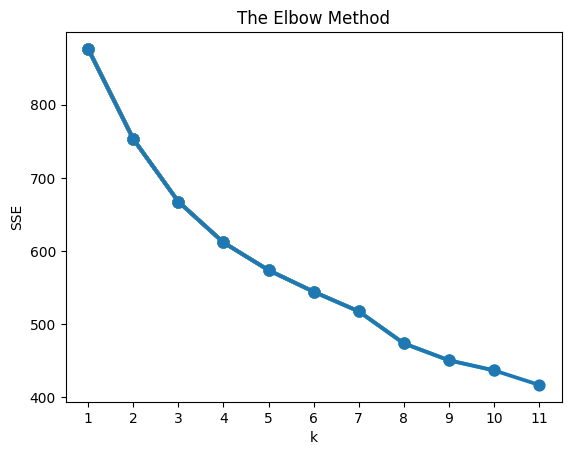

In [138]:
from sklearn.cluster import KMeans
SSE = {}
for k in range(1,12):
  # Initialize Kmeans with K clusters
  kmeans = KMeans(n_clusters=k, random_state=317)
  # Fit kmeans to standardized dataframe
  kmeans.fit(water_rides_standard)
  # Append SSE to dictionary
  SSE[k] = kmeans.inertia_

  #Adding the plot title "The Elbow Method"
  plt.title('The Elbow Method')
  #Adding the x and y labels
  plt.xlabel('k')
  plt.ylabel('SSE')
  sns.pointplot(x=list(SSE.keys()), y=list(SSE.values()))


G. Build a k-means model with your desired number of clusters.


In [139]:
kmeans = KMeans(n_clusters=5, random_state=317) # Model with 5 clusters
kmeans.fit(water_rides_standard)
cluster_labels = kmeans.labels_


H. Generate and show mean values for each of your clusters.


In [140]:
# Assigning cluster values to the dataframe
water_rides_df = water_rides_df.assign(Cluster = cluster_labels)
water_rides_df.groupby(['Cluster']).agg({'rider_group' : ['mean'],
                                          'max_speed' : 'mean',
                                          'max_hourly_throughput' : 'mean',
                                          'avg_duration' : 'mean',
                                          'square_feet' : 'mean',
                                          'maintenance_cost' : ['mean', 'count']}).round(2)

rider_group max_speed max_hourly_throughput avg_duration square_feet  \
               mean      mean                  mean         mean        mean   
Cluster                                                                        
0              4.55     32.15                650.09        66.66     8163.63   
1              2.81     19.37                684.38        77.36     8305.31   
2              2.81     28.28                395.18        69.75     9428.99   
3              2.02     29.45                716.00        71.56     8739.88   
4              3.08     27.03                826.68        71.63     6937.14   

        maintenance_cost        
                    mean count  
Cluster                         
0                5295.68    33  
1                5470.57    21  
2                4805.65    27  
3                5994.09    40  
4                4553.31    25

*Answer: F(b) - The number of clusters ideal for segmentation is 5 as the clusters are more stable, there is sufficient differentiation and provides meaningful groups for further targeting.*

I. Build any four simple visualizations to help management better understand your clusters (a simple visualization could be a histogram, a barplot, a scatterplot, etc.) You may wish to facet your visualizations by cluster. For each one of your visualizations, include 2-3 sentences of description/
explanation. What does it show about your model?

In [141]:
water_rides_df['Cluster'] = water_rides_df['Cluster'].astype('category')
water_rides_df['Cluster'] = water_rides_df['Cluster'].cat.rename_categories({0 :'speed_thrills',
                                                                                   1 :'gentle_fun',
                                                                                   2 : 'quick_intense',
                                                                                  3 : 'adventure_cruise',
                                                                                  4 : 'relaxed_ride'})
water_rides_df['Cluster'].dtype

CategoricalDtype(categories=['speed_thrills', 'gentle_fun', 'quick_intense',
                  'adventure_cruise', 'relaxed_ride'],
, ordered=False, categories_dtype=object)

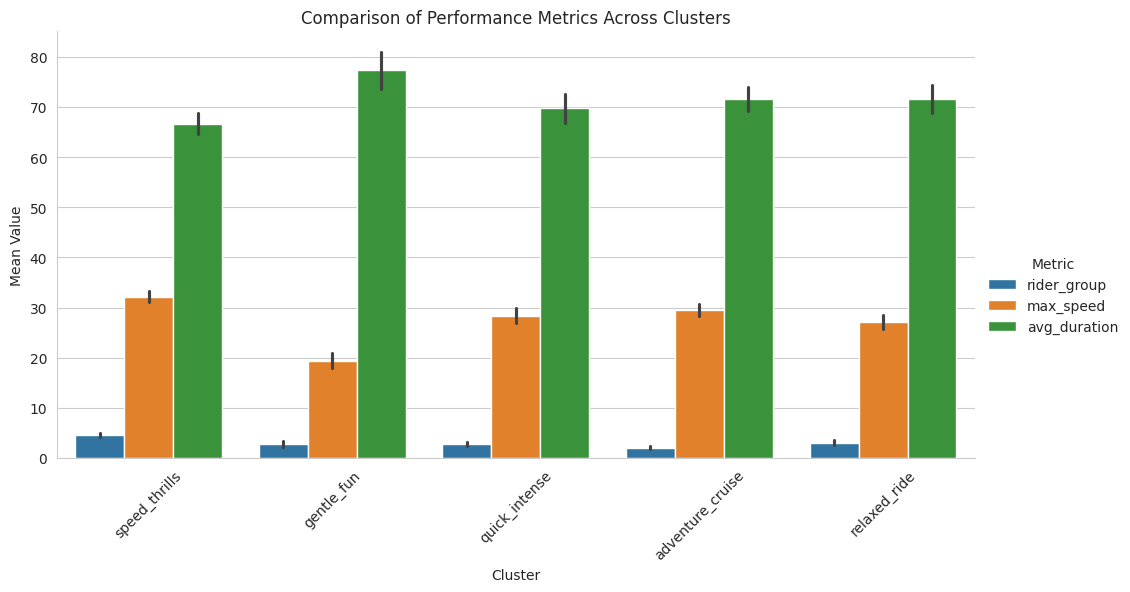

In [152]:
# Bar plot visualizing comparison of performance metrics of ride clusters
melted_data = water_rides_df.melt(id_vars="Cluster", value_vars=['rider_group',
                                   'max_speed', 'avg_duration'], var_name="Metric",
                                    value_name="Value")
sns.set_style("whitegrid")
g = sns.catplot(data=melted_data,x="Cluster", y="Value", hue="Metric", kind="bar",
                height=5, aspect=2)
plt.title("Comparison of Performance Metrics Across Clusters")
plt.xticks(rotation=45)
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.show()

*Answer: The above bar plot is a comparison of performance metrics like number of riders that can ride at a time, max speed of the ride and average duration of the ride across clusters. It is evident from the cluster name that speed_thrills ride have the max speed and shortest duration while on the other hand of the spectrum are gentle fun rides which have slowest speed but have very high duration of the ride. Another interesting thing to note is that duration in all the other rides is similar which was the case even with increase in clusters.*

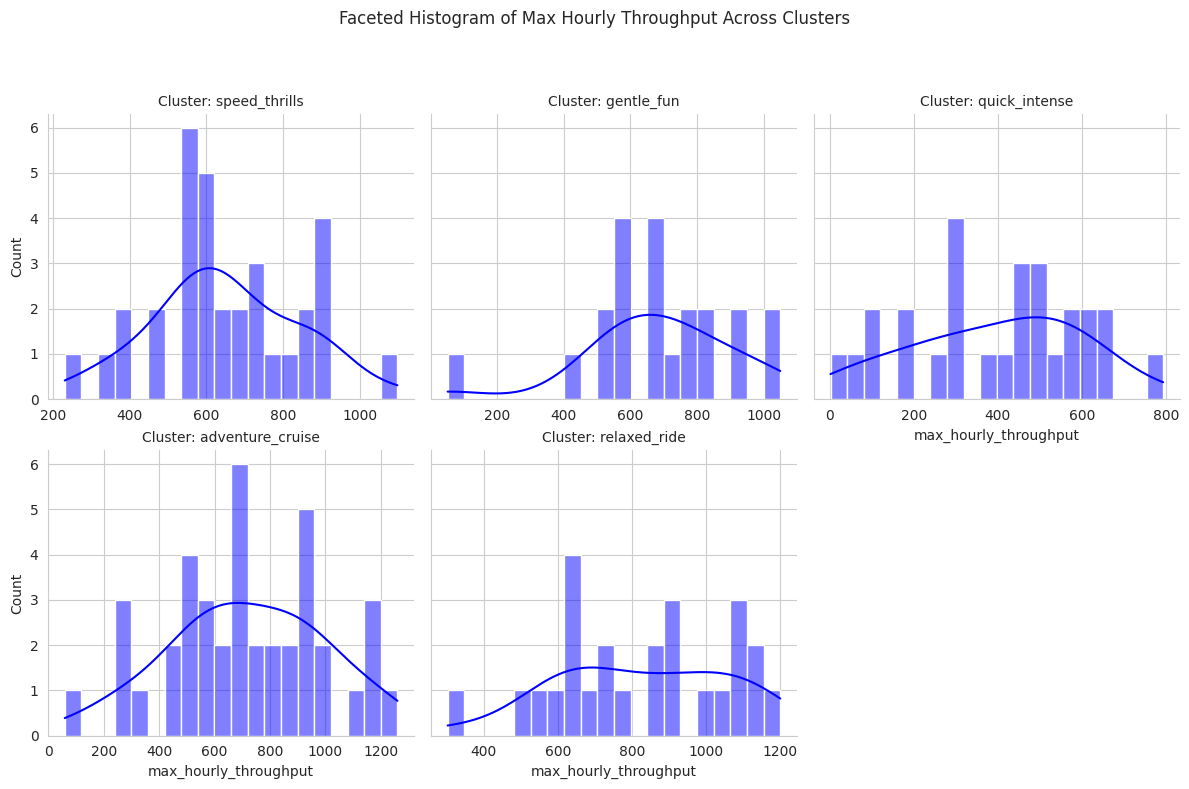

In [155]:
# Visualizing faceted histogram across clusters of max hourly throughput
sns.set_style("whitegrid")
g = sns.FacetGrid(water_rides_df, col="Cluster", col_wrap=3, height=4,
                  sharex=False, sharey=True)
g.map(sns.histplot, "max_hourly_throughput", bins=20, kde=True, color="blue")
g.set_titles(col_template="Cluster: {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Faceted Histogram of Max Hourly Throughput Across Clusters")
plt.show()

*Answer: There is an inverse relation of throughput with average duration to some extent, all the ride types do have a duration of around 60-70secs which means the throughput of almost all rides will be less and are most likely in range of 600-800 visitors/hour. Adventure cruise and speed thrills do have some peaks there which are either outliers or due to higher max speeds in these rides.*

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


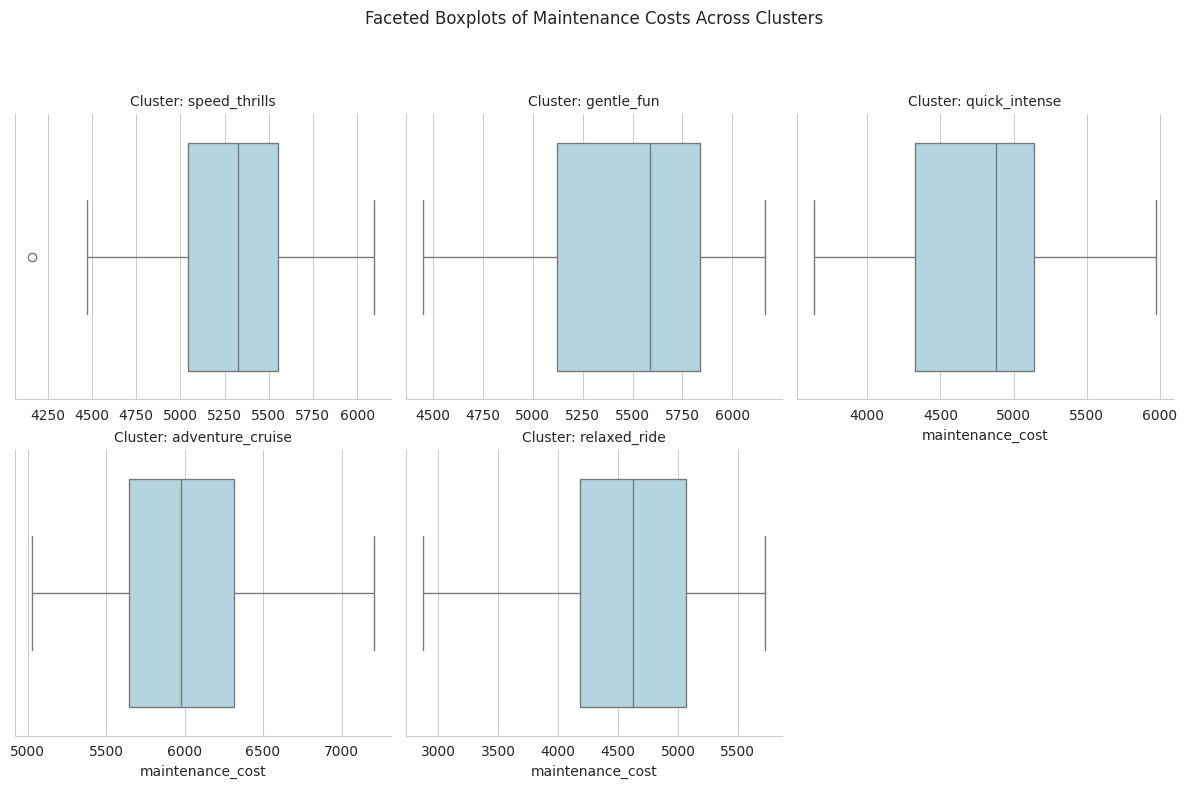

In [164]:
# Faceted Boxplots of maintenance costs of rides across clusters
sns.set_style("whitegrid")
g = sns.FacetGrid(water_rides_df, col="Cluster", height=4, col_wrap=3,
                  sharex=False, sharey=True)
g.map(sns.boxplot,'maintenance_cost', color="lightblue", flierprops={"marker" : "o"})
g.set_titles(col_template="Cluster: {col_name}")
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Faceted Boxplots of Maintenance Costs Across Clusters")
plt.show()

*Answer: The plot describes the distribution of maintenance cost for all clusters of rides. There isn't a major distinction between the cost which suggests standardization of some sort in the making of the structures. There is just one outlier in speed thrills which has lower cost than the most rides in the cluster, which likely seems an error.*

<ipython-input-165-7e81b04a3723>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="square_feet", data=water_rides_df, palette="coolwarm",


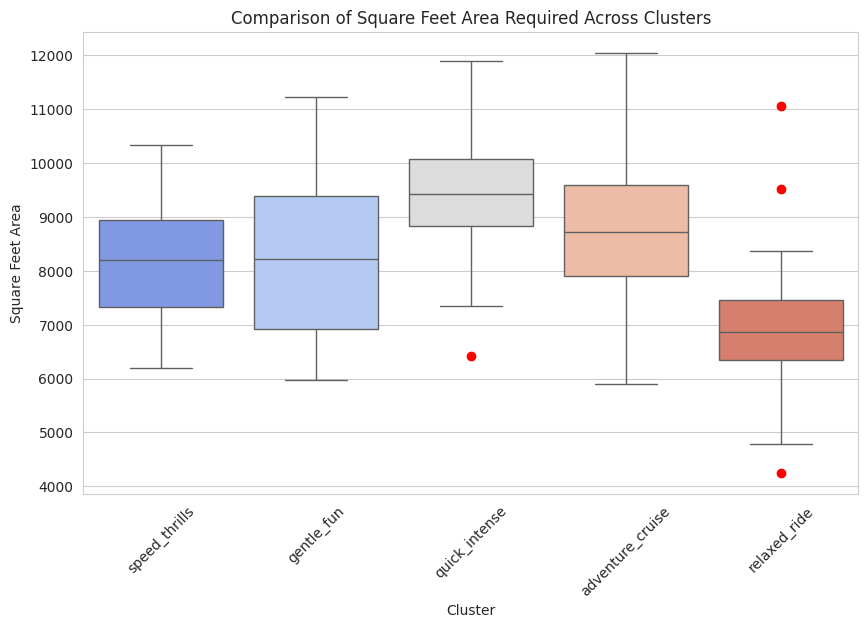

In [165]:
# Boxplot of square feet area across clusters
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cluster", y="square_feet", data=water_rides_df, palette="coolwarm",
            flierprops={'marker': 'o', 'markerfacecolor': 'red', 'markeredgecolor': 'red'})
plt.title("Comparison of Square Feet Area Required Across Clusters")
plt.xticks(rotation=45)
plt.xlabel("Cluster")
plt.ylabel("Square Feet Area")
plt.show()

*Answer: Interestingly enough, square feet area required for different type of clusters does have some major distinctions. We can see that moderate speed rides require more square feet area obviously because the route is the most exciting factor here and if we think of something like haunted mansion, that doesn't focus on speed but various props then it does require more sq ft area. Speed thrills on the other hand majorly focus on speed so the path will be much shorter.*

J. Give a descriptive name to each one of your clusters, along with a few sentences of explanation for the name that you chose. Keep in mind that the data itself is describing
rides (not visitors) - here in this step, you’re describing clusters of rides.

*Answer: The clusters have already been named above, however I will list them with explanations here. The naming convention is majorly based on there performance attributes rather than logistics. 1. Speed Thrills - These are rides that have higher than average max speed in comparison to other clusters and focus on that adrenaline rush for a reasonable amount of time.
2.Gentle fun - These are rides with lowest speeds and high duration of time, likely for kids who would want to ride either single or with one parent/guardian. 3. Quick intense - These are also 1 to 2 rider seating rides with slightly higher than moderate speeds and average duration but more likely to have that quick burst of speed. 4. Adventure cruise - These are similar to quick burst rides but have slightly longer duration, made for calm rides. 5. Relaxed rides - These are mostly for group rides or family fun with lower than moderate speeds but high duration and as much fun as others.*

K. For each cluster, also include a couple sentences about targeting. What types of visitors would be interested in these groups of rides, and how should Lobster Land reach them? You can exercise some ‘creative freedom’ here with this answer. A good answer will go beyond just saying “send a coupon” to each group.


*Answer: 1. Speed Thrills - These are mostly excited visitors who would love an adrenaline rush so they would love a competition with an incentive to win a prize along with park visit. 2. Gentle fun - These are mostly for families with young kids so promotion by partnering with soft toy brands and or ice cream brands to promote a coupon or season ticket to these groups. 3.Quick intense - These are restless people who would not want to wait hours to experience something but at the same time want it to be done quickly, so seasonal discounts to attract them to the park for casual dates or having a good time. 4. Adventure cruise and relaxed rides  - These are most likely similar groups so most of these are laidback people who love to be on bed or couch and stream their favorite content so an exclusive park experience recorded as a promo ad will be attention grabbing for these audiences and convert them likely by retargeting through social media.*

L. How can Lobster Land use this model? This is the most open-ended question on the assignment, so stop and take a moment with it – it’s not a “throwaway question.” Write
2-3 paragraphs here to assess the way that Lobster Land might be able to use these results. You might want to think about some ‘what if’ scenarios, and some ways in
which Lobster Land’s priorities could impact their decision regarding the way to use the
model.


*Answer: As previously mentioned at the start of building the segmentation model and rationale for variable selection, the purpose is to use the model not only to broaden the ride portfolio in the park to increase visitor footfall but also to improve operational efficiency of lobster land and better inform their marketing as well as financial decisions. Let's dive deeper into these:
By performance and costs measures used for clustering, Lobster land can not only focus on different types of attractions that it can offer but also identify the gaps in its current offerings and fill them by considering investing in one of these rides as per visitor preferences. For example the model presents high number of high speed thrill rides but under-represents family rides if that represents the current portfolio of Lobster land then it can improve its mix by picking some family friendly rides from these clusters.
Beyond ride selection, the park can also look at segmentation to inform its pricing strategy and resource allocation. If it picks up some of the high maintenance rides to add and its the need of the hour then the park can either increase its daily pass prices or add these rides as an add on to the daily ticket as a charge with occassional discounts to keep the footfall volume up.
Ultimately, the use of segmentation model should be done in an effort to align it with business priorities and customer needs.*

**Part II. Conjoint Analysis with a Linear Model (4 points)**
A. Read the dataset coaster_choices.csv into your local environment in Jupyter Notebook

In [143]:
coaster_df = pd.read_csv('coaster_ratings.csv')
coaster_df.head()

,rocketlaunch,maxspeed,material,seats_car,drop,track_color,avg_rating
0,Yes,40,Steel,2,100,red,9.669
1,Yes,40,Steel,2,100,blue,5.288
2,Yes,40,Steel,2,100,green,2.121
3,Yes,40,Steel,2,100,white,5.576
4,Yes,40,Steel,2,200,red,8.272


B. Based on the descriptions shown above, which of your variables are numeric, and which are categorical? (The standard you should use when answering this is that something that is both represented by a number, and for which that number has valid mathematical meaning, is numeric).


*Answer: Categorical variables - Rocket launch, Material, Track color, seats_car, max speed and drop. Only average rating is a continuous numeric variable in this dataset.*

C. Use the pandas get_dummies() function in order to prepare these variables for use in a linear model. Inside this function, include this argument: drop_first = True. Doing this will save us from the multicollinearity problem that would make our model unreliable. Be sure to dummify ALL of your input variables, even the numeric ones.
a. Why should the numeric input variables based on this survey data be dummified?

In [144]:
coaster_df.columns

Index(['rocketlaunch', 'maxspeed', 'material', 'seats_car', 'drop',
       'track_color', 'avg_rating'],
      dtype='object')

In [145]:
coaster2_df = pd.get_dummies(coaster_df, drop_first=True, columns= ['rocketlaunch', 'maxspeed',
                                                                    'material', 'seats_car',
                                                                    'drop', 'track_color'])
coaster2_df.columns

Index(['avg_rating', 'rocketlaunch_Yes', 'maxspeed_60', 'maxspeed_80',
       'material_Wood', 'seats_car_4', 'drop_200', 'drop_300',
       'track_color_green', 'track_color_red', 'track_color_white'],
      dtype='object')

*Answer: (a) - Input numeric variables in survey responses are discrete options presented to responders, they do not exist along a continuous range, so we don't want to imply that to the linear model. Also, dummifying inputs into separate choices would help in analysis if there is non-linearity in the numeric values, which means that we can identify if the consumers chose a middle option for any of the responses.*

D. Build a linear model with your data, using the average rating as the outcome variable, and with all of your other variables as inputs.


In [146]:
X = coaster2_df[['rocketlaunch_Yes', 'maxspeed_60', 'maxspeed_80',
       'material_Wood', 'seats_car_4', 'drop_200', 'drop_300',
       'track_color_green', 'track_color_red', 'track_color_white']]
y = coaster2_df['avg_rating']

In [147]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

E. Display the coefficient values of your model inputs.


In [148]:
coef_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coef_df

,Coefficient
rocketlaunch_Yes,0.980514
maxspeed_60,1.937927
maxspeed_80,1.303698
material_Wood,-0.619986
seats_car_4,-0.526125
drop_200,0.880396
drop_300,0.850167
track_color_green,0.386097
track_color_red,1.943069
track_color_white,-0.242778


F. Write a paragraph or two for Lobster Land management about what your model is showing you. It would be good here to include some detail about which features seemed to be most
popular, or least popular, among respondents. However, a truly thoughtful answer to this question will go beyond simply listing the coefficients in order of popularity. What OTHER
insights can you draw from this? Is there anything else that you think Lobster Land should consider before simply implementing the ‘most popular’ options? Remember, Lobster Land
hired you as a consultant -- don’t be afraid to show some creativity here.

*Answer: Lets begin by analysing the first response to having a rocket launch start to the roller coaster, a 0.98 increase in preference suggests that responders do prefer rocket launch but we wouldn't suggest considering this decision in isolation, reason being the responses to speed from the responders, a increase from 40mph to 60mph is 1.93 which is positive increment but going from 60mph to 80mph is just 1.30mph which is not as great. So in reality the responders have not preferred the max speed, so building a rocket launch for the ride and then reducing the speed to 60mph might seem to be a weird experience but the analytical judgement of this can be left on engineers. Moving along, steel material is preferred for the ride structure over wood by considerable margin which aligns well because steel is considered much durable and resistant to harsh climate changes than wood and most importantly we know that wooden roller coasters make huge noise than steel structure which can be unpleasant experience for some visitors. Also, the 4 seat car for the roller coaster is also not preferred which is again more or less expected because a family or a couple with 3 might find it uneasy to sit with a stranger by their side and also if they want photographs they would definitely not want to have it photobombed by a random stranger. Similar to speed of the ride the height of the vertical drop preferred is 200 feet and the increase in preference from 100ft to 200 is 0.88 but the further increase to 300 ft is only 0.85 points, so the tradeoff might not be beneficial it is better to stick to 200ft plus there is tendency to select the maximum possible value however in reality when standing next to it, people might be reluctant. Lastly, if we look at color preference red has garnered the most preference likely because of the lobster color association and it more aligns with the theme of the park. But it will be preferrable to drill down to what shade of red in another survey so it can be easier to implement based on responses.*

**Part III. Wildcard: Marketing & Segments (1 point)**
A. Find ANY advertisement…ANYWHERE. As you walk around in your daily life, you might look for an ad on the side of the T, on a bus stop, on a poster, etc. Alternatively, you could use an advertisement that you encounter while browsing the web.
a. Take a picture of the ad that you see (if it’s in the ‘real world’). Or, if the ad you select is online, take a screenshot from your phone or your laptop to capture this advertisement.
b. Write ONE thoughtful paragraph that addresses the issue of segmentation. What consumer segment is your ad targeting? What makes you think this? What types of consumers are in the segment? Are you part of the segment? Or, alternatively, is your ad an undifferentiated (mass market) ad? Finally, what is
your opinion of this ad – is it effective?

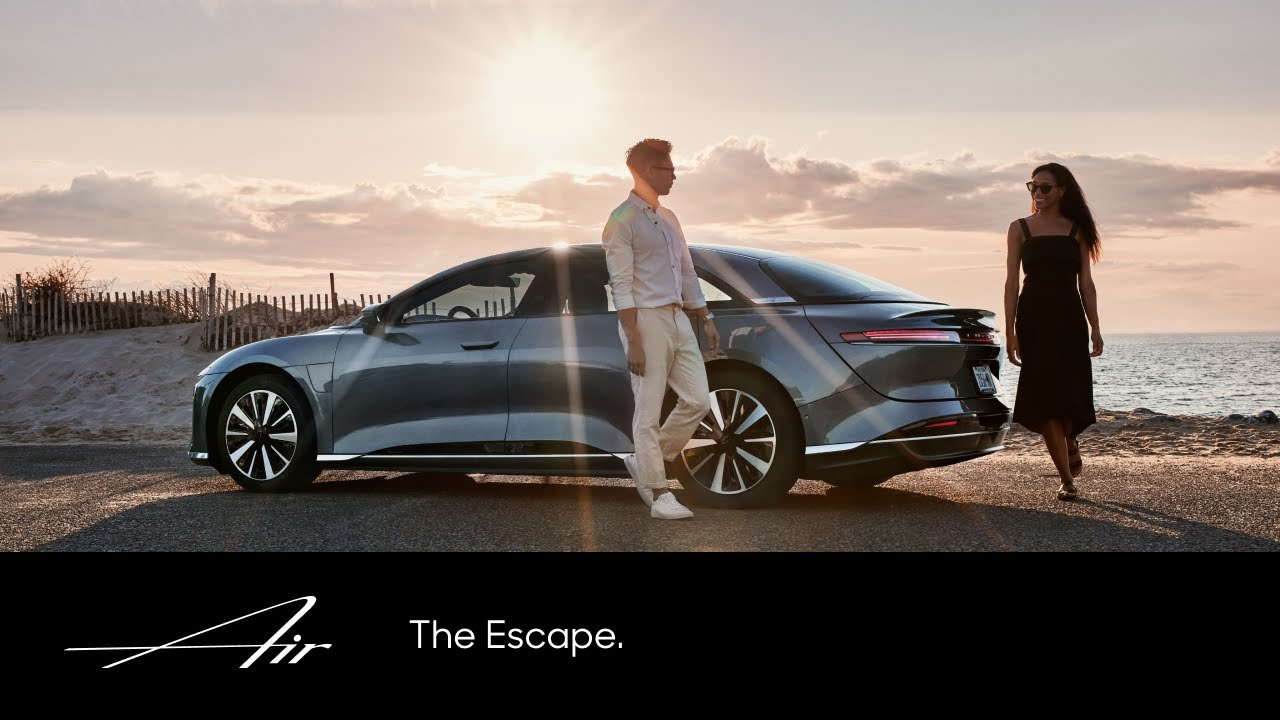

Answer: part B - This is a Lucid an automobile company's latest ad of their 2025 car Lucid air. Since Lucid is a luxury electric car brand, it competes in a niche high end customer market. The ad targets affluent, urban dwellers who are early adopters of technology or more so tech savvy, they consider themselves environment concious and they prefer stylist and luxurious options and there choices are representation of themselves. These are affluent millennials who have achieved great heights on professional front and they love to make a style statement through their daily choices. If we look at the characters, the setting in the ad and the tagline itself "The Escape" it speaks about these characteristics.

No, I am not part of this segment, at least yet. The ad is very effective, one of the common features in luxurious brand advertisement is that they always have minimalistic approach as they know their customers or enthusiasts know them well and often their ads are to the point speaking more about the emotional impact the product brings and then maybe speaking about one or two functional benefits that solve customers problems. In short, there ads are very succinct and easy to follow.